In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=FutureWarning)

In [3]:
raw_data = pd.read_excel('final_data.xlsx')
raw_data

,year,month,carrier,carrier_name,airport,City name,State Name,Airport name,Arrival Flights,arr_del15,...,Carrier Delay Calibrated,Weather Delay Calibrated,NAS Delay Calibrated,Security Delay Calibrated,Late Aircraft Delay Caibrated,Carrier Delay Efficieny calibrated,Weather Delay Efficiency calibrated,NAS Dealy Efficieny calibrated,Security Dealy Efficieny calibrated,LA Delay Efficieny calibrated
0,2016,12,AA,American Airlines Inc.,MSP,Minneapolis,Minnesota,Minneapolis-St Paul International,739.0,180.0,...,1.000000,0.700752,1.000000,0.004255,1.0,0.918742,0.727137,0.331064,0.983520,0.657761
1,2016,12,AA,American Airlines Inc.,STL,St. Louis,Missouri,St Louis Lambert International,678.0,122.0,...,1.000000,0.598496,0.905852,0.021809,1.0,0.929086,0.751144,0.750327,0.984487,0.617868
2,2016,12,AA,American Airlines Inc.,DFW,Dallas/Fort Worth,Texas,Dallas/Fort Worth International,11157.0,1920.0,...,1.000000,1.000000,1.000000,0.096809,1.0,0.948271,0.735795,0.661169,0.979161,0.628753
3,2016,12,AA,American Airlines Inc.,LAX,Los Angeles,California,Los Angeles International,3394.0,1040.0,...,1.000000,1.000000,1.000000,0.009574,1.0,0.931724,0.622427,0.000000,0.983853,0.707652
4,2016,12,AA,American Airlines Inc.,ORD,Chicago,Illinois,Chicago O'Hare International,5037.0,1016.0,...,1.000000,1.000000,1.000000,0.051596,1.0,0.945267,0.837335,0.416754,0.983295,0.660478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108142,2022,1,YX,Republic Airline,SYR,Syracuse,New York,0,1.0,0.0,...,0.909000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108143,2022,1,YX,Republic Airline,TPA,Tampa,Florida,12.98,5.0,0.0,...,0.942796,0.991613,0.860430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108144,2022,1,YX,Republic Airline,TUL,Tulsa,Oklahoma,0.95,0.0,0.0,...,0.964444,1.000000,0.894444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108145,2022,1,YX,Republic Airline,VPS,Valparaiso,Florida,0.93,0.0,0.0,...,1.000000,1.000000,0.690000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_data.isna().sum()

year                                      0
month                                     0
carrier                                   0
carrier_name                              0
airport                                   0
City name                                 0
State Name                             1549
Airport name                              0
Arrival Flights                         169
arr_del15                               365
Carrier Count                           169
Weather Delay Count                     169
NAS Count                               169
Security Count                          169
LA Count                                169
Arrival Canceled(Count)                 338
Arrival Diverted(Count)                 169
Arrival Delay Calibrated                  0
Carrier Delay Calibrated                  0
Weather Delay Calibrated                  0
NAS Delay Calibrated                      0
Security Delay Calibrated               169
Late Aircraft Delay Caibrated   

In [5]:
columns_to_encode = raw_data.select_dtypes(include='object').columns.tolist()
columns_to_encode

['carrier',
 'carrier_name',
 'airport',
 'City name ',
 'State Name',
 'Airport name']

In [6]:
for column in columns_to_encode:
    raw_data[column] = raw_data[column].astype(str)

In [7]:
le = LabelEncoder()

# Apply LabelEncoder in a loop
for col in columns_to_encode:
    raw_data[col + '_enc'] = le.fit_transform(raw_data[col])

# Drop original columns
raw_data = raw_data.drop(columns_to_encode, axis=1)

In [8]:
for column in raw_data.columns:
    if raw_data[column].isnull().any():
        raw_data[column] = raw_data[column].fillna(raw_data[column].mean())

In [9]:
raw_data.isna().sum()

year                                   0
month                                  0
Arrival Flights                        0
arr_del15                              0
Carrier Count                          0
Weather Delay Count                    0
NAS Count                              0
Security Count                         0
LA Count                               0
Arrival Canceled(Count)                0
Arrival Diverted(Count)                0
Arrival Delay Calibrated               0
Carrier Delay Calibrated               0
Weather Delay Calibrated               0
NAS Delay Calibrated                   0
Security Delay Calibrated              0
Late Aircraft Delay Caibrated          0
Carrier Delay Efficieny calibrated     0
Weather Delay Efficiency calibrated    0
NAS Dealy Efficieny calibrated         0
Security Dealy Efficieny calibrated    0
LA Delay Efficieny calibrated          0
carrier_enc                            0
carrier_name_enc                       0
airport_enc     

<Axes: >

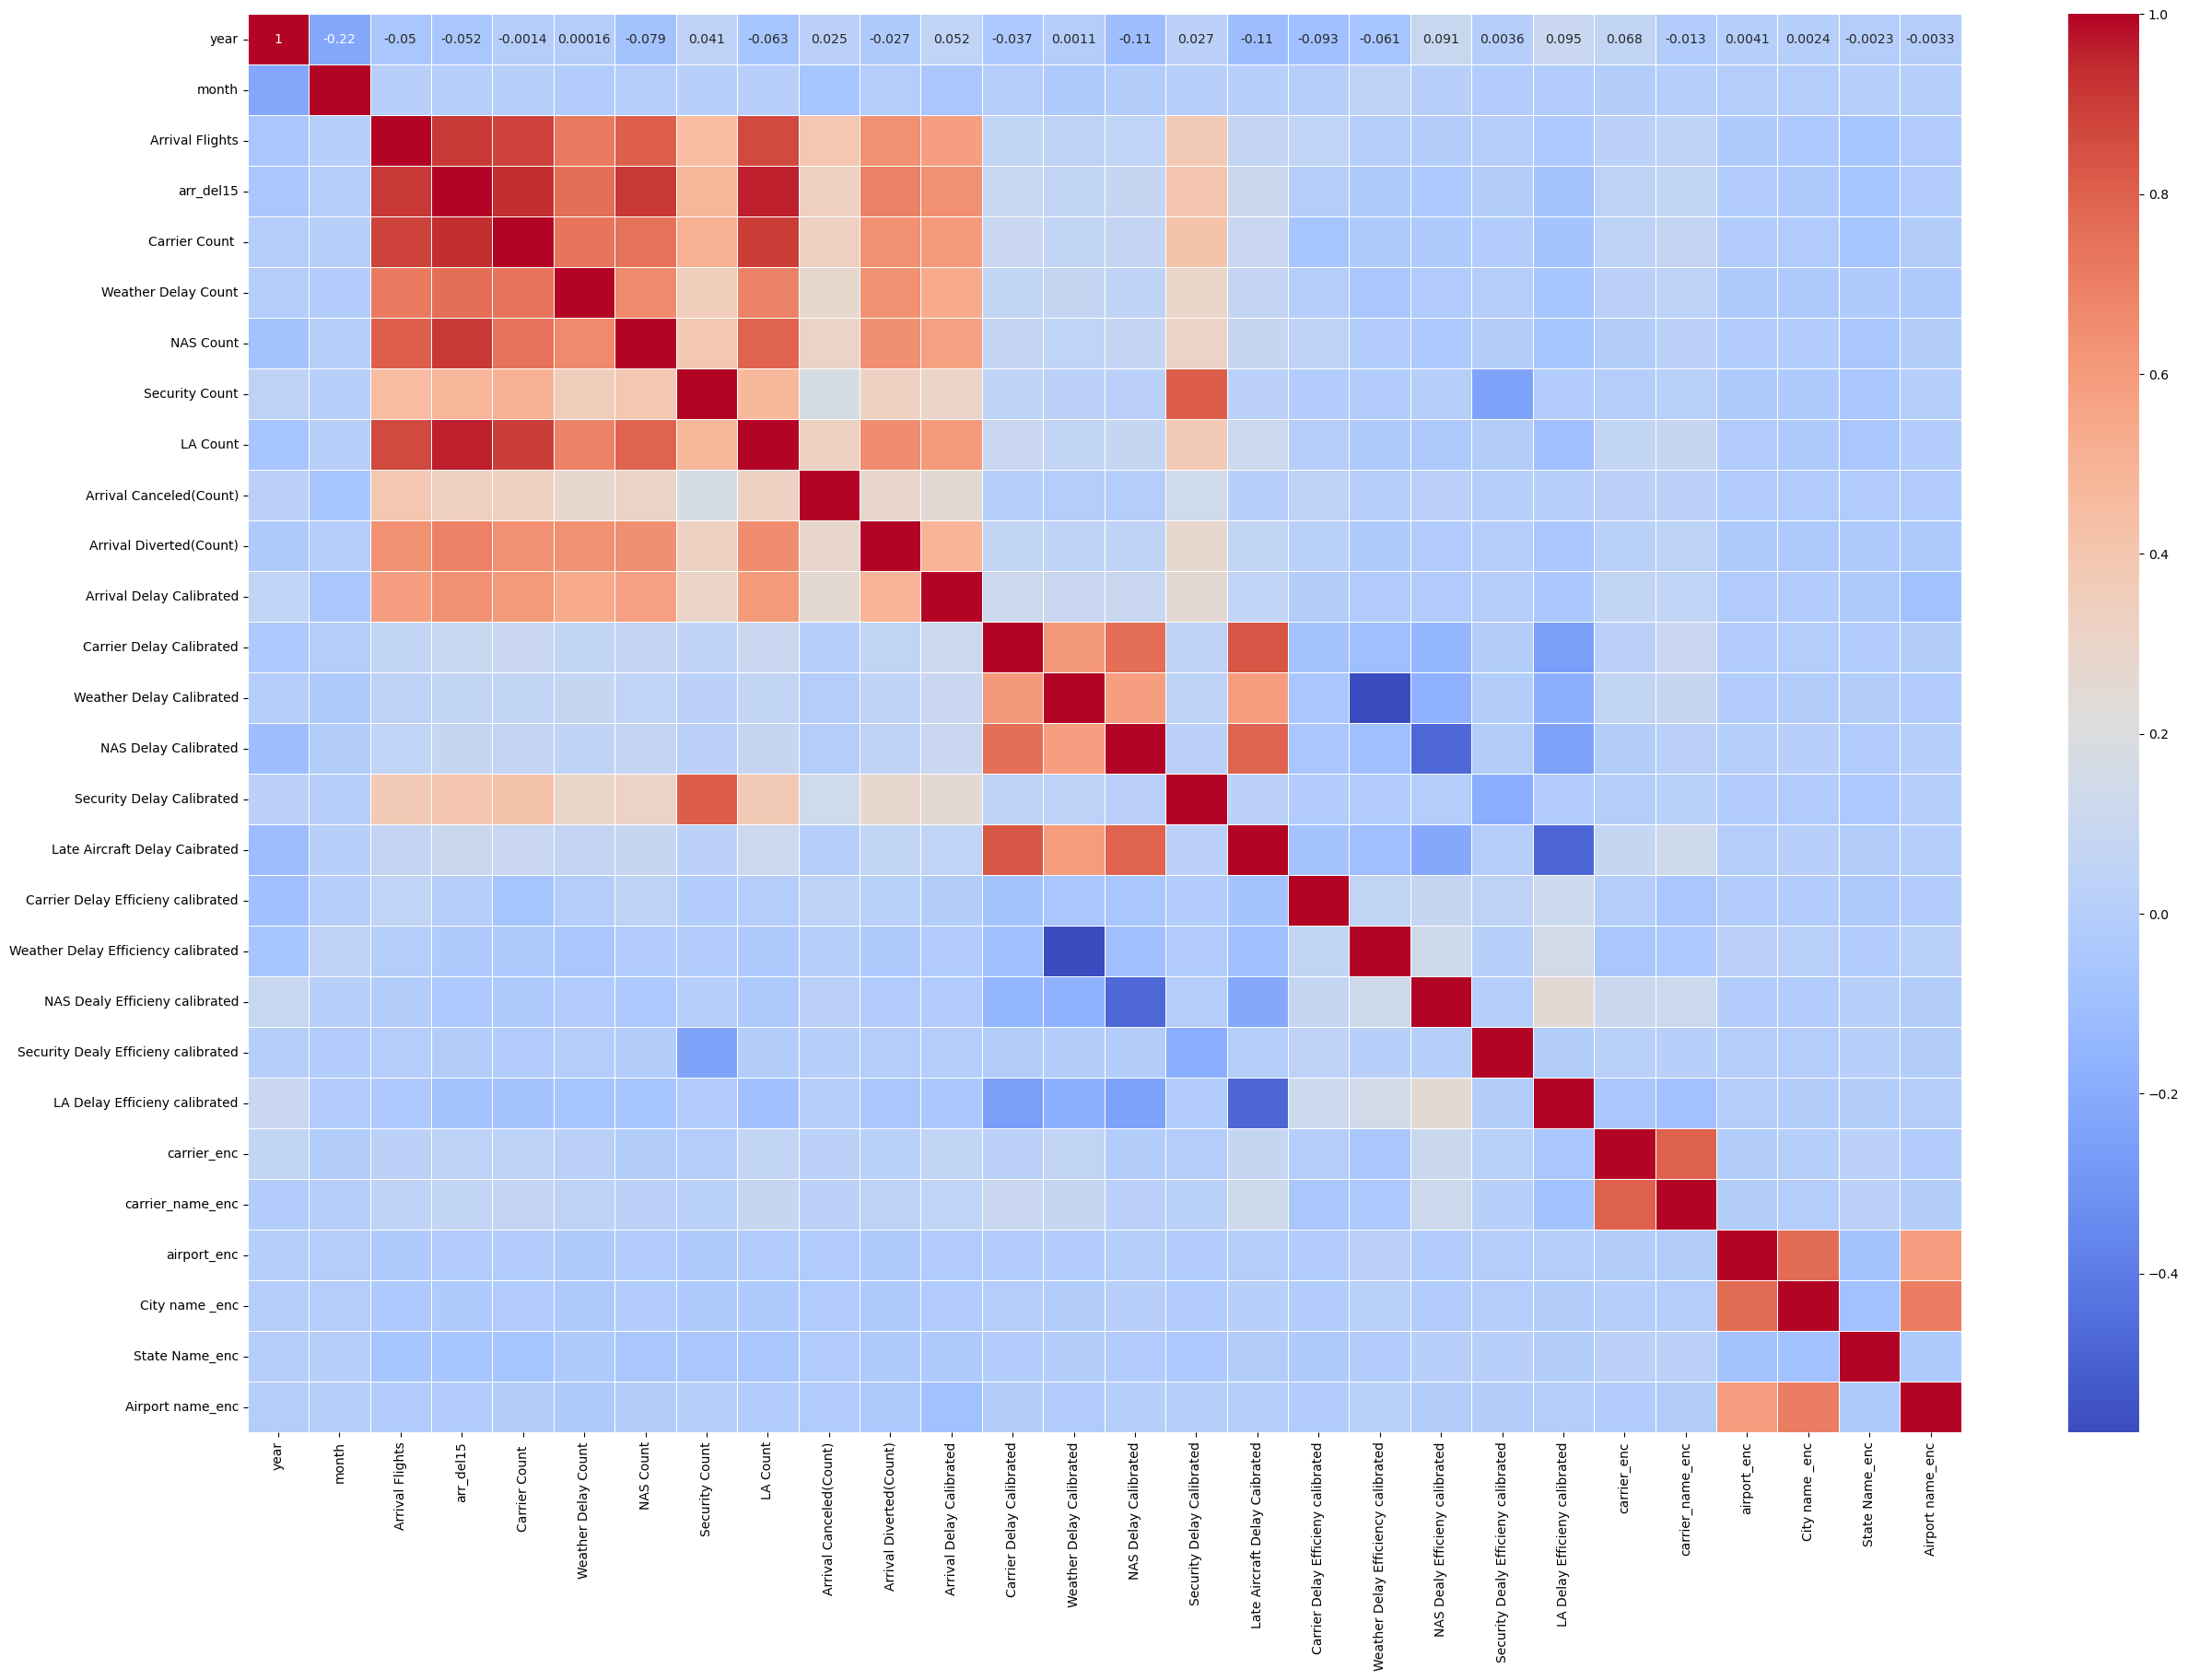

In [10]:
# Plotting a heatmap
x = raw_data.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(x,annot=True,cmap='coolwarm',linewidths=0.5)

In [11]:
# from scipy import stats
# z_score_threshold = 3
# z_scores = stats.zscore(raw_data)
# outlier_indices = (z_scores > z_score_threshold).any(axis=1)
# cleaned_data = raw_data[~outlier_indices]
# cleaned_data

In [12]:
# Finding the correlation of all the columns with the Class column
correlations = raw_data.corr()['Arrival Delay Calibrated'].abs().sort_values()

# Print the correlations
print(correlations)

Security Dealy Efficieny calibrated    0.003598
Carrier Delay Efficieny calibrated     0.006527
airport_enc                            0.016941
Weather Delay Efficiency calibrated    0.019658
City name _enc                         0.020081
NAS Dealy Efficieny calibrated         0.020522
State Name_enc                         0.033749
LA Delay Efficieny calibrated          0.045835
year                                   0.052017
Late Aircraft Delay Caibrated          0.052475
month                                  0.053178
carrier_name_enc                       0.055067
carrier_enc                            0.059165
Airport name_enc                       0.084175
NAS Delay Calibrated                   0.094908
Weather Delay Calibrated               0.098488
Carrier Delay Calibrated               0.107032
Arrival Canceled(Count)                0.255141
Security Delay Calibrated              0.256021
Security Count                         0.301212
Arrival Diverted(Count)                0

In [13]:
# Filtering out the columns that have correlation of less than 0.4 with Class_enc
low_correlation_cols = correlations[correlations < 0.01].index.tolist()
low_correlation_cols

['Security Dealy Efficieny calibrated', 'Carrier Delay Efficieny calibrated']

In [14]:
# We have deleted all the columns that have correlation less than 0.4 with the Class_enc
data1 = raw_data.drop(low_correlation_cols,axis=1)

In [15]:
data1 = data1.drop('month',axis=1)

In [16]:
# Defining the independent variable (X) and dependent variable (y)
X = data1.drop(["Arrival Delay Calibrated"], axis = 1)
y = data1["Arrival Delay Calibrated"]

# Splitting the dataset into 70% training and 30% testing data with use of stratified sampling method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=2)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)

# r2=model.score(X_test,y_test)
# print("Linear Regression - R-squared:", r2)

In [19]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2=model.score(X_test,y_test)
print(f"Decision Tree - R-squared: {r2*100:.2f}")

Decision Tree - R-squared: 95.87
